# Gradient Descent, Backpropagation, and Simple Neural Networks
This notebook introduces:
1. Linear regression via least squares and gradient descent  
2. Visualizing how gradient descent approaches the minimum  
3. Extending to a simple 2-neuron ReLU network and backpropagation


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# ---------- Part A: Linear regression (analytic and GD) ----------
# Dataset 1: perfect linear fit
xs1 = np.array([4.0, 3.0, 2.0])
ys1 = np.array([3.0, 2.0, 1.0])

# Analytic solution (closed form)
n = len(xs1)
Sx = xs1.sum(); Sy = ys1.sum()
Sxx = (xs1**2).sum(); Sxy = (xs1*ys1).sum()
w_closed = (n*Sxy - Sx*Sy) / (n*Sxx - Sx**2)
b_closed = (Sy - w_closed*Sx) / n
print("Dataset1 analytic: w =", w_closed, " b =", b_closed)


Dataset1 analytic: w = 1.0  b = -1.0


In [3]:
# Dataset 2: for gradient descent demo (not perfectly linear)
xs2 = np.array([4.0, 2.5, 2.0])
ys2 = np.array([3.0, 2.0, 1.0])

# Analytic for dataset 2 (reference)
n = len(xs2)
Sx = xs2.sum(); Sy = ys2.sum()
Sxx = (xs2**2).sum(); Sxy = (xs2*ys2).sum()
w_star = (n*Sxy - Sx*Sy) / (n*Sxx - Sx**2)
b_star = (Sy - w_star*Sx) / n
print("Dataset2 analytic: w* =", w_star, " b* =", b_star)

Dataset2 analytic: w* = 0.9230769230769231  b* = -0.6153846153846155


In [4]:
# Gradient descent implementation


GD iterations (first 8):
iter 0: w=0.000000, b=0.000000, loss=2.333333
iter 1: w=0.633333, b=0.200000, loss=0.055972
iter 2: w=0.655833, b=0.200556, loss=0.053157
iter 3: w=0.658488, b=0.194681, loss=0.052745
iter 4: w=0.660485, b=0.188641, loss=0.052342
iter 5: w=0.662446, b=0.182639, loss=0.051945
iter 6: w=0.664391, b=0.176682, loss=0.051554
iter 7: w=0.666322, b=0.170770, loss=0.051168
... final (it 59): w=0.920035, b=-0.606070, loss=0.025645


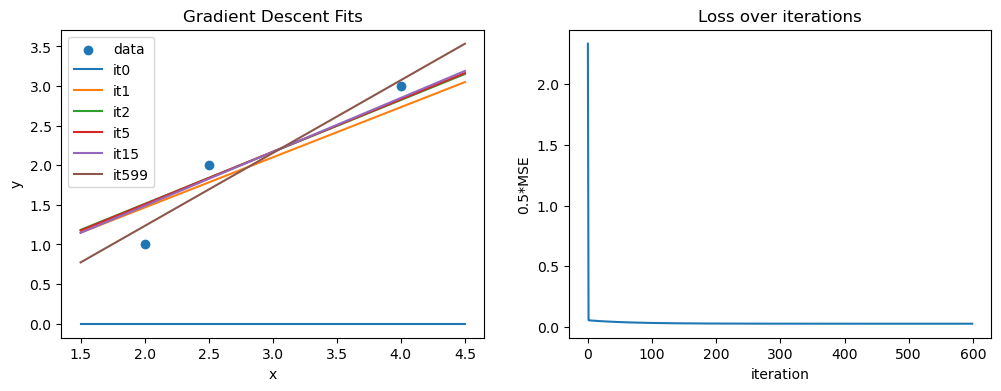

In [40]:
def loss_and_grads(w,b,xs,ys):
    n = len(xs)
    preds = w*xs + b
    errs = preds - ys
    loss = 0.5 * (errs**2).mean()
    dw = (errs * xs).mean()
    db = errs.mean()
    return loss, dw, db

# Run GD
w = 0.0; b = 0.0
lr = 0.1
history = []
for it in range(600):
    loss, dw, db = loss_and_grads(w,b,xs2,ys2)
    history.append((it,w,b,loss))
    w -= lr * dw
    b -= lr * db

# Print first few iterations
print("\nGD iterations (first 8):")
for it,wv,bv,l in history[:8]:
    print(f"iter {it}: w={wv:.6f}, b={bv:.6f}, loss={l:.6f}")
print("... final (it 59): w={:.6f}, b={:.6f}, loss={:.6f}".format(*history[-1][1:]))

# Plot data and fits
fig, ax = plt.subplots(1,2, figsize=(12,4))
ax[0].scatter(xs2, ys2, label='data')
xline = np.linspace(1.5,4.5,200)
for it, wv,bv,l in [history[i] for i in [0,1,2,5,15,599]]:
    ax[0].plot(xline, wv*xline + bv, label=f'it{it}')
ax[0].legend(); ax[0].set_title("Gradient Descent Fits")
ax[0].set_xlabel("x"); ax[0].set_ylabel("y")

ax[1].plot([h[0] for h in history], [h[3] for h in history])
ax[1].set_title("Loss over iterations")
ax[1].set_xlabel("iteration")
ax[1].set_ylabel("0.5*MSE")
plt.show()


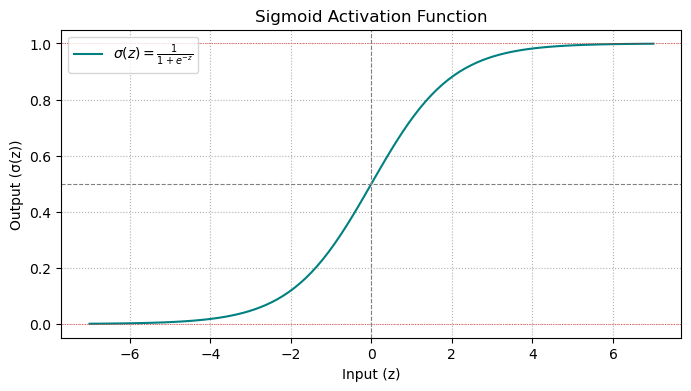

In [54]:
# --- 💡 The Sigmoid Function ---

# 1. Mathematical Definition
# The sigmoid function, often denoted as σ(z), is defined by the formula:
# σ(z) = 1 / (1 + e⁻ᶻ)

def sigmoid(z):
    """Calculates the sigmoid value for a given input z."""
    return 1 / (1 + np.exp(-z))

# 2. Key Properties
# * Output Range: It maps any real-valued input z to an output in the range (0, 1).
# * Shape: It is a continuous, differentiable, S-shaped (sigmoidal) curve.
# * Interpretation: Historically used in neural networks to model the probability
#   of a neuron firing, as its output can be interpreted as a probability.

# 3. Visualization
z = np.linspace(-7, 7, 100)
a = sigmoid(z)

plt.figure(figsize=(8, 4))
plt.plot(z, a, label=r'$\sigma(z) = \frac{1}{1 + e^{-z}}$', color='teal')
plt.axhline(0.5, color='gray', linestyle='--', linewidth=0.8)
plt.axhline(1.0, color='red', linestyle=':', linewidth=0.5)
plt.axhline(0.0, color='red', linestyle=':', linewidth=0.5)
plt.axvline(0, color='gray', linestyle='--', linewidth=0.8)
plt.title('Sigmoid Activation Function')
plt.xlabel('Input (z)')
plt.ylabel('Output (σ(z))')
plt.grid(True, linestyle='dotted')
plt.legend()
plt.show()

# Derivative of the Sigmoid Function

The **sigmoid function** is defined as:

$$
\sigma(x) = \frac{1}{1 + e^{-x}}
$$

Its derivative can be computed step by step:

1. Start with the definition:  

$$
\sigma(x) = (1 + e^{-x})^{-1}
$$

2. Differentiate using the chain rule:  

$$
\frac{d}{dx} \sigma(x) = -1 \cdot (1 + e^{-x})^{-2} \cdot (-e^{-x}) = \frac{e^{-x}}{(1 + e^{-x})^2}
$$

3. Rewrite in terms of \(\sigma(x)\):  

$$
1 - \sigma(x) = \frac{e^{-x}}{1 + e^{-x}}
$$

$$
\frac{d}{dx} \sigma(x) = \frac{e^{-x}}{(1 + e^{-x})^2} = \sigma(x) (1 - \sigma(x))
$$

So the derivative of the sigmoid function is:

$$
\sigma'(x) = \sigma(x) \big(1 - \sigma(x)\big)
$$


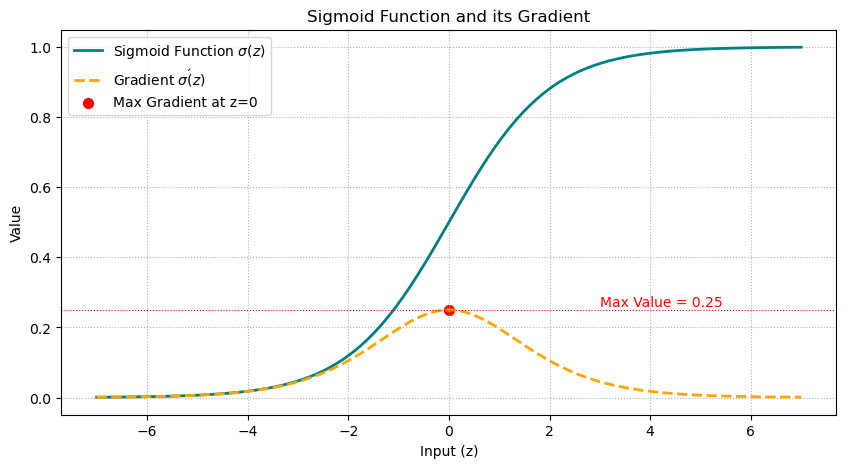

Maximum value of the gradient (at z=0): 0.25


In [55]:
# --- 💡 The Sigmoid Function and its Gradient ---

# 1. Mathematical Formulas
# Sigmoid Function:   σ(z) = 1 / (1 + e⁻ᶻ)
# Gradient (Derivative): σ'(z) = σ(z) * (1 - σ(z))

def sigmoid(z):
    """Sigmoid function σ(z)."""
    return 1 / (1 + np.exp(-z))

def sigmoid_gradient(z):
    """Gradient of the sigmoid function σ'(z)."""
    a = sigmoid(z)
    return a * (1 - a)

# 2. Visualization
z = np.linspace(-7, 7, 100)
a = sigmoid(z)
grad_a = sigmoid_gradient(z)

plt.figure(figsize=(10, 5))

# Plot the Sigmoid function
plt.plot(z, a, label=r'Sigmoid Function $\sigma(z)$', color='teal', linewidth=2)

# Plot the Gradient
plt.plot(z, grad_a, label=r'Gradient $\sigma\'(z)$', color='orange', linestyle='--', linewidth=2)

# Highlight key points
plt.scatter(0, sigmoid_gradient(0), color='red', s=50, label='Max Gradient at z=0')

# Annotate the max gradient value (which is 0.25)
plt.axhline(0.25, color='red', linestyle=':', linewidth=0.8)
plt.text(3, 0.26, 'Max Value = 0.25', color='red')

plt.title('Sigmoid Function and its Gradient')
plt.xlabel('Input (z)')
plt.ylabel('Value')
plt.grid(True, linestyle='dotted')
plt.legend()
plt.show()

# 3. Key Observations
print(f"Maximum value of the gradient (at z=0): {sigmoid_gradient(0):.2f}")
# The maximum slope is 0.25, which occurs at z=0.
# As |z| becomes large (e.g., z=-5 or z=5), the gradient approaches 0.
# This phenomenon is known as the **Vanishing Gradient** problem, as it causes
# learning to slow down or stop completely in deep neural networks.

In [ ]:
# Sigmoid Through back propagation (GD) learned parameters visualization
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def forward_pass_hidden(X, W1, B1):
    """Computes Z1 (pre-activation) and A1 (hidden activation)."""
    Z1 = X @ W1 + B1 # @ is a matric multiplication
    A1 = sigmoid(Z1)
    return Z1, A1

def forward_pass_full(X, W1, B1, W2, B2):
    """Computes the final network output (A2)."""
    _, A1 = forward_pass_hidden(X, W1, B1)
    A2 = A1 @ W2 + B2
    return A2

# --- Data Range for Visualization ---
x_range = np.linspace(1.0, 5.0, 100).reshape(-1, 1)

<>:19: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:20: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:19: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
<>:20: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
/tmp/ipykernel_11307/1999116942.py:19: SyntaxWarning: "\c" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\c"? A raw string is also an option.
  plt.plot(x_range, Contrib1, label=f'Neuron 1: $W_{{21}} \cdot \sigma(W_{{11}}x+B_{{11}})$', color='orange', linestyle='--')
/tmp/ipykernel_11307/1999116942.py:20: SyntaxWarning: "\c" is an invalid

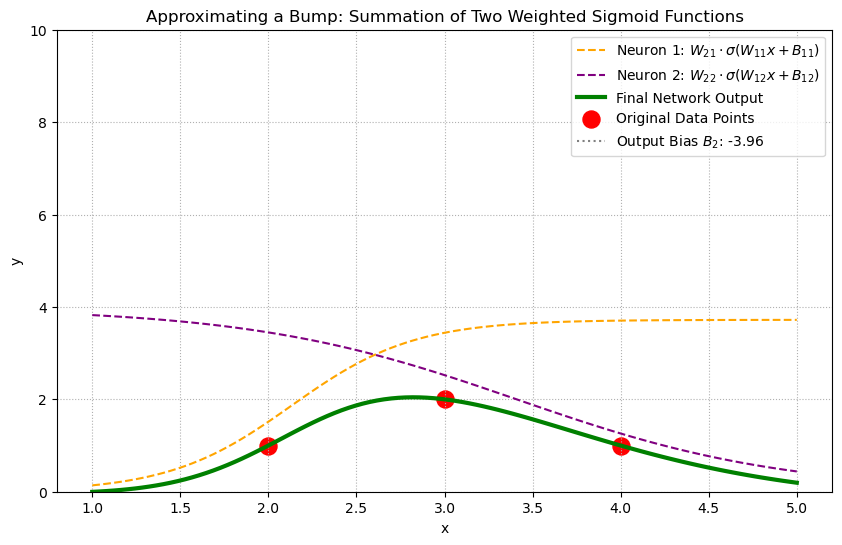

In [53]:
# Extract parameters for clarity
W11, W12 = W1[0, 0], W1[0, 1]
B11, B12 = B1[0, 0], B1[0, 1]
W21, W22 = W2[0, 0], W2[1, 0]
B2_val = B2[0, 0]

# Calculate the hidden layer activations (A1)
Z1, A1 = forward_pass_hidden(x_range, W1, B1)

# Calculate the weighted contributions
Contrib1 = W21 * A1[:, 0].reshape(-1, 1)
Contrib2 = W22 * A1[:, 1].reshape(-1, 1)
Final_Output = Contrib1 + Contrib2 + B2_val

# --- Plotting ---
plt.figure(figsize=(10, 6))

# Plot the individual, weighted contributions of the hidden neurons
plt.plot(x_range, Contrib1, label=f'Neuron 1: $W_{{21}} \cdot \sigma(W_{{11}}x+B_{{11}})$', color='orange', linestyle='--')
plt.plot(x_range, Contrib2, label=f'Neuron 2: $W_{{22}} \cdot \sigma(W_{{12}}x+B_{{12}})$', color='purple', linestyle='--')

# Plot the final output (the sum of contributions plus bias)
plt.plot(x_range, Final_Output, label='Final Network Output', color='green', linewidth=3)

# Plot the original data points
xs_np = np.array([2.0, 3.0, 4.0])
ys_np = np.array([1.0, 2.0, 1.0])
plt.scatter(xs_np, ys_np, label='Original Data Points', color='red', marker='o', s=150)

plt.axhline(y=B2_val, color='gray', linestyle=':', label=f'Output Bias $B_2$: {B2_val:.2f}')

plt.title('Approximating a Bump: Summation of Two Weighted Sigmoid Functions')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True, linestyle='dotted')
plt.ylim(0, 10)
plt.show()

In [ ]:
# Two Neuron ReLu Network Annalytically fitting

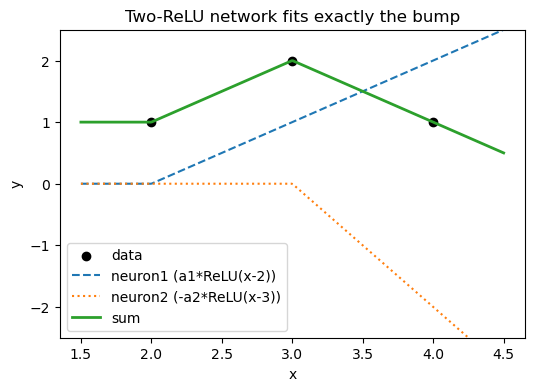

In [7]:
# Hard-code ReLU breakpoints
def relu(x):
    return np.maximum(0, x)

xgrid = np.linspace(1.5,4.5,400)

# Solve manually:
# f(x) = a1*ReLU(x-2) - a2*ReLU(x-3) + c
# 3 equations, 3 unknowns (a1, a2, c)
# At x=2: y=1 -> a1*0 - a2*0 + c = c = 1 -> c=1
# At x=3: y=2 -> a1*1 - a2*0 + c = a1 + 1 = 2 -> a1 = 1
# At x=4: y=1 -> a1*2 - a2*1 + c = 2 - a2 + 1 =1 -> a2 =2
a1, a2, c = 1, 2, 1

y1 = a1 * relu(xgrid - 2)
y2 = -a2 * relu(xgrid - 3)
ysum = y1 + y2 + c

plt.figure(figsize=(6,4))
plt.scatter(xs, ys, color='k', label='data')
plt.plot(xgrid, y1, '--', label='neuron1 (a1*ReLU(x-2))')
plt.plot(xgrid, y2, ':', label='neuron2 (-a2*ReLU(x-3))')
plt.plot(xgrid, ysum, '-', lw=2, label='sum')
plt.ylim(-2.5,2.5)
plt.xlabel('x'); plt.ylabel('y')
plt.legend()
plt.title('Two-ReLU network fits exactly the bump')
plt.show()